## Homework 6, Problem 1 on reaching data and neural data

ECE C143A/C243A, Spring Quarter 2023, Prof. J.C. Kao, TAs T. Monsoor, R. Gore, D. Singla

Total: 20 points

Download the dataset `JR_2015-12-04_truncated2.mat` from BruinLearn.

This data structure contains simultaneous reaching (kinematic) data and neural data.
A large part of this question will be getting acquainted with this data.

Loading the downloaded file will drop a variable called `R`, in your Python workspace.
We will call this variable the R-dict (or sometimes R-struct).

It is an array of dictionaries, with each dictionary in the array corresponding to one trial performed by Monkey J. In this data, Monkey J is performing a reaching task in which he acquires a center target, and then a peripheral target. After acquiring the peripheral target, he comes back to acquire the center target, and then acquires another peripheral target. This task is called a "center-out-and-back" task as the monkey continuously reaches from the center to a peripheral target, and then back to the center.

This assignment incorporates the `scipy` package.  If you do not have it installed, you can install it by running:

`pip install scipy`

You may also install a package compiler for scientific computing, like `anaconda`: https://www.anaconda.com/download/

In [192]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.special
import scipy.io as sio
import math
import nsp as nsp
import pprint as pprint
# Load matplotlib images inline
%matplotlib inline
# Reloading any code written in external .py files.
%load_ext autoreload
%autoreload 2
data = sio.loadmat('JR_2015-12-04_truncated2.mat') # load the .mat file.
R = data['R'][0,:]

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### (a) (1 point) How many trials?

How many trials were performed by Monkey J in this R-struct?

In [58]:
#====================================================#
# YOUR CODE HERE:
#   Calculate the number of trials in the R-dict
#====================================================#
print(len(R))

# all_keys = set().union(*(d.keys() for d in R[0]))
print(d for d in R[0])

#====================================================#
# END YOUR CODE
#====================================================#

506
<generator object <genexpr> at 0x1762168e0>


Answer: 506 trials

### (b) (2 point) Where are the targets?

`R[i]['target']` is the target that Monkey J reached to on trial `i`.  How many unique targets are there?  Please provide a 2D plot of all the target locations.  Ignore the 3rd dimension ($z$-location) which is by default set at $-70$ (i.e., it was not used). The units of `R[0,i]['target']` are in millimeters.


[[0, 0], [0, -120], [-84.85000000000001, -84.85000000000001], [120, 0], [-84.85000000000001, 84.85000000000001], [-120, 0], [0, 120], [84.85000000000001, -84.85000000000001], [84.85000000000001, 84.85000000000001]]


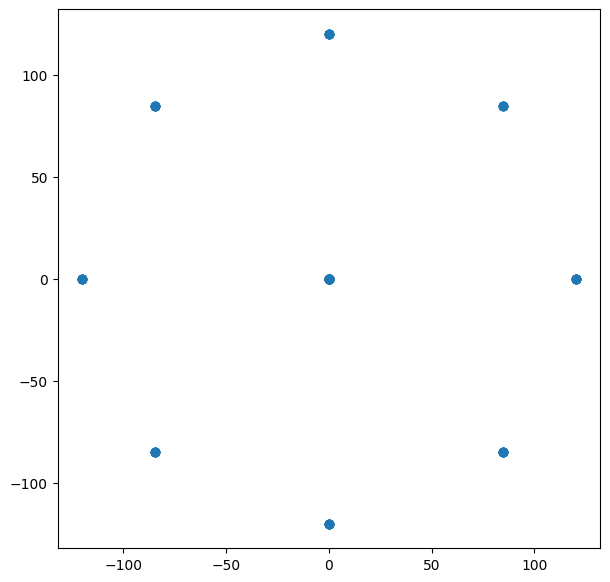

In [141]:
plt.figure(figsize=(7,7))
#====================================================#
# YOUR CODE HERE:
#   Generate 2D plot of all the target locations 
#====================================================#
x_coords = []
y_coords = []
ref = []
for i in range(100):
    val = R[i]['target']
    x = val[0][0]
    y = val[1][0]
    x_coords.append(x)
    y_coords.append(y)
    
    if [x,y] not in ref:
        ref.append([x,y])

plt.scatter(x_coords, y_coords)
# print(x_coords)
# print('\n')
# print(y_coords)
print(ref)
#====================================================#
# END YOUR CODE
#====================================================#
plt.show()

Question: How many unique targets(including the center target) are there?

Answer: 9

### (c) (1 point) How many failures?

`R[i]['isSuccessful']` indicates if Monkey J successfully acquired the target on trial $i$.  This means that he reaches to the target and holds his position within a $4$cm by $4$cm box centered around the target for $500$ms.  How many failures are there in this R-struct? 

Hint: `isSuccessful` attribute has the dtype of uint8. Be careful about data types; in general it's always good practice to perform operations on same data types.  If the number of trials is encoded as an `int`, you should cast the `isSuccessful` variable to be an int. You may achieve this by calling `isSuccessful = np.asarray(R['isSuccessful'], dtype=int)`.

In [60]:
#====================================================#
# YOUR CODE HERE:
#   Calculate the number of failures in the R-dict
#====================================================#
count = 0
for i in range(506): 
    success = R[i]['isSuccessful']
    if success == 0:
        count += 1
print(count)
#====================================================#
# END YOUR CODE
#====================================================#

0


Question: How many failures are there in this R-struct?

Answer: There are 0 failures.

### (d) (2 points) Kinematic sampling. [Code is provided; but you still need to analyze the output and answer the question]

`R[i]['cursorPos']` is a $3 \times T_i$ matrix that contains the monkey's hand position over time on trial $i$, where $T_i$ is the length of trial $i$ in milliseconds. 

* The 1st row is the $x$ position and the 2nd row is the $y$ position of Monkey J.
* The units are in millimeters.
* Ignore the 3rd row -- which is $z$ position (set to $-70$ mm by default in this data).
* Each column represents $1$ ms.  That is, if $T_i = 1032$, this indicates that the trial lasted for $1032$ milliseconds. Note that `R[i]['cursorPos'][:,-1]` and `R[i+1]['cursorPos'][:,0]` are also separated by $1$ ms, so that the R-struct contains millisecond resolution data and no segments of time are unobserved.
* The kinematics in `R[0,i]['cursorPos']` are sampled from a system called 'Polaris' that tracks a bead taped on the monkey's finger.
		
Observe the values of `R[i]['cursorPos']`.
Does the ''Polaris'' system sample the monkey's kinematics at $1$ ms resolution (i.e., $1000$ Hz)?
If not, approximately at what frequency does Polaris sample the kinematics?        

In [86]:
#set printoption so that you can view the whole array by call print 
# np.set_printoptions(threshold=np.nan)
#====================================================#
# YOUR CODE HERE:
#   Analysis the frequency of sampling
#====================================================#
i=1
print(R[i]['cursorPos'][:,0:200])
# we just print 0:200 because there are too many elements, 200 is enough to estimate the frequency
lenOfTrial = len(R[i]['cursorPos'][0]) # = 1017
# print(lenOfTrial)
# 1 ms resolution
# 1017 ms
# average = 16 trials equaling the same number

''' The values stay at 1.73, then jump to 1.96. Then, they jump to 2.23. 
    Average the number of times it stays on a certain values, then divide 1000 hz by that number.
    That's the resolution we're actually sampling at.
'''
#====================================================#
# END YOUR CODE
#====================================================#

[[  1.73   1.73   1.73   1.73   1.73   1.73   1.73   1.73   1.73   1.73
    1.96   1.96   1.96   1.96   1.96   1.96   1.96   1.96   1.96   1.96
    1.96   1.96   1.96   1.96   1.96   1.96   2.23   2.23   2.23   2.23
    2.23   2.23   2.23   2.23   2.23   2.23   2.23   2.23   2.23   2.23
    2.23   2.23   2.23   2.47   2.47   2.47   2.47   2.47   2.47   2.47
    2.47   2.47   2.47   2.47   2.47   2.47   2.47   2.47   2.47   2.47
    2.66   2.66   2.66   2.66   2.66   2.66   2.66   2.66   2.66   2.66
    2.66   2.66   2.66   2.66   2.66   2.66   2.83   2.83   2.83   2.83
    2.83   2.83   2.83   2.83   2.83   2.83   2.83   2.83   2.83   2.83
    2.83   2.83   2.83   2.93   2.93   2.93   2.93   2.93   2.93   2.93
    2.93   2.93   2.93   2.93   2.93   2.93   2.93   2.93   2.93   2.93
    2.99   2.99   2.99   2.99   2.99   2.99   2.99   2.99   2.99   2.99
    2.99   2.99   2.99   2.99   2.99   2.99   3.05   3.05   3.05   3.05
    3.05   3.05   3.05   3.05   3.05   3.05   3.05   3.05   3.05

" The values stay at 1.73, then jump to 1.96. Then, they jump to 2.23. \n    Average the number of times it stays on a certain values, then divide 1000 hz by that number.\n    That's the resolution we're actually sampling at.\n"

Question: Does the 'Polaris' system sample the monkey's kinematics at  1  ms resolution (i.e., 1000Hz)? If not, approximately at what frequency does Polaris sample the kinematics?

Answer: No, the Polaris system does not sample the monkey's kinematics at a 1 ms resolution. Instead, it samples it at approximately 65 hz.

### (e) (1 points) Reach trajectories.

Present a 2D plot showing Monkey J's hand position across the entire R-dict. Does it look like the plot of a center-out-and-back task?

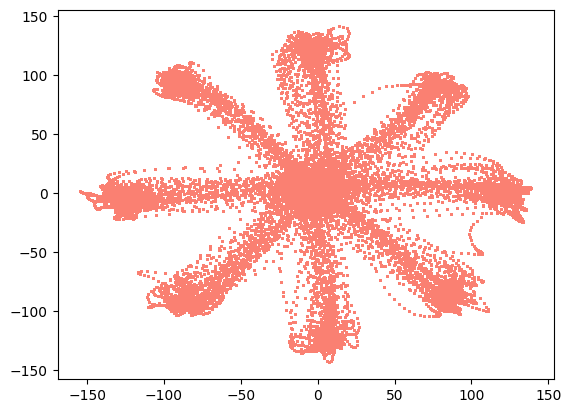

In [64]:
#====================================================#
# YOUR CODE HERE:
#   Generate 2D plot of hand position
#====================================================#
for i in range(506): plt.scatter(R[i]['cursorPos'][0], R[i]['cursorPos'][1], color = 'salmon', s = 1)
#====================================================#
# END YOUR CODE
#====================================================#

Question: Does it look like the plot of a center-out-and-back task?

Answer:
Yes! It does.

### (f) (1 points) Number of electrodes.

The R-struct contains neural data recorded from electrode arrays implanted in Monkey J's motor cortex.

We'll only consider `R[i]['spikeRaster']`, which is an $N \times T_i$ matrix of activity from primary motor cortex (M1).

(There is an `R[i]['spikeRaster2']`, which we will ignore. It contains activity from PMd.)

There are $N$ electrodes, and each electrode is measuring spiking activity. Each row of `R[i]['spikeRaster']` corresponds to the spiking activity, at millisecond resolution, for Monkey J. If the value of row $n$ and column $t$ is 1, then it indicates that a neuron spiked on electrode $n$ at time $t$. If the value of this entry is 0, it indicates that no spike occurred on electrode $n$ at time $t$.

Note that we store `R[i]['spikeRaster']` as a sparse matrix, since a neuron is often not spiking (corresponding to $0$'s).

It is more memory efficient to store the locations of the non-zero values in the matrix than to store the entire matrix.

In Python, one may use the command `.todense()` to make this a standard matrix.

How many electrode channels are there?         

In [92]:
#====================================================#
# YOUR CODE HERE:
#   Calculate the number of electrode channels
#====================================================#
print((R[i]['spikeRaster'].shape[0]))
# Ti = num of samples at 1 ms each (1017 samples, each trial 1017 ms)
# N = number of electrodes
#====================================================#
# END YOUR CODE
#====================================================#

96


Question: How many electrode channels are there?     

Answer: 96

### (g) (4 points) Spike raster. [Code solution provided; please understand it]

Plot a spike raster of all reaches to the right target, located at (120 mm,0 mm), for electrode 17.          
(Hint: use the `nsp.PlotSpikeRaster` function in `nsp.py`.)     

Text(0.5, 1.0, 'Spike Raster')

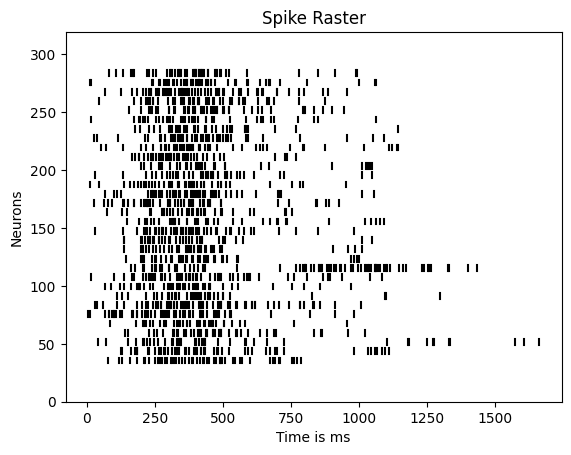

In [96]:
#====================================================#
# YOUR CODE HERE:
#  Generate spike raster of all reaches to the right target
#====================================================#
trial_num = 506
spike_train = np.empty((0,0),dtype = list)
f = 0
for i in range(trial_num):
    target = R[i]['target'][0:2] # target that monkey reached to on trial i. 3 values for x,y,z position.  
    if target[0]==120 and target[1]== 0 :
        spike_train = np.append(spike_train,0)
        spike_train[f] =  R[i]['spikeRaster'][16,:].todense().nonzero()[1]
        f = f + 1
nsp.PlotSpikeRaster(spike_train)
plt.xlabel('Time is ms')
plt.ylabel('Neurons')
plt.title('Spike Raster')
#====================================================#
# END YOUR CODE
#====================================================#

### (h) (4 points) ISI distribution.

Plot the ISI distribution for electrode 17 across all trials in the R-dict (i.e., one ISI histogram with data from all reaches).  
Make the ISI histogram bins $10$ ms wide. Did we spike sort this neural data?

Text(0.5, 1.0, 'ISI Distribution')

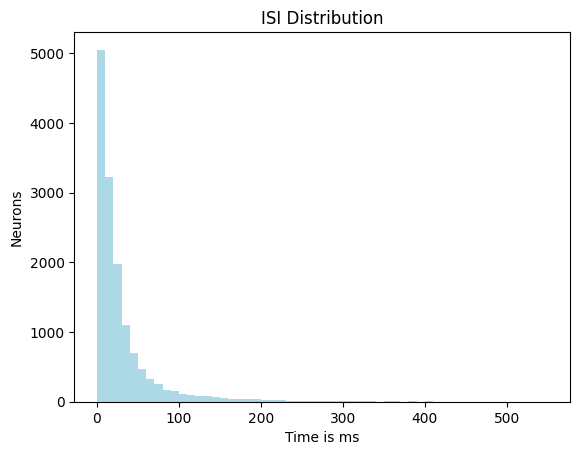

In [135]:
#====================================================#
# YOUR CODE HERE:
#   Generate the ISI distribution for electrode 17
#====================================================#
trial_num = 506
spike_train = np.empty((0,0),dtype = list)
f = 0

# print(R[0]['spikeRaster'][16,:].todense().nonzero()[1])
allSpikes = []
ISI = []
''' 506 trials '''
for i in range(trial_num - 1):
    spikes =  R[i]['spikeRaster'][16,:].todense().nonzero()[1]
    # print(spikes)
    # spikes for trial 0 = [  8  10  45  52  59 145 189 192 236 243 304 325 350 355 398 406 415 463 522]
                # these are the time values where the spikes occur
    allSpikes.append([spikes])
    
    for x in range(len(spikes) - 1): #calculate ISI of spike train for electrode 17 for each trial
        # calculate the ISI's
        ISI += [spikes[x + 1] - spikes[x]]
    
bins = np.arange(0, max(ISI), 10)
plt.hist(ISI, bins=bins,color = 'lightblue')
plt.xlabel('Time is ms')
plt.ylabel('Neurons')
plt.title('ISI Distribution')
#====================================================#
# END YOUR CODE
#====================================================#

Question: Did we spike sort this neural data?

Answer:    
No. If we had spike sorted the neural data, then we would have been able to see the refractory period in the above plot.

### (i) (4 points) PSTH.

Plot the average firing rate for each of 8 unique peripheral reach directions for electrode 17.

To do so, we have provided a binning function, `nsp.bin` which takes a spike raster matrix and counts the spikes in non-overlapping windows of some length $\Delta t$ (to be specified as an input) for each neuron.

Do the following: 
* Call `nsp.bin` in the correct way to bin the spikes in non-overlapping $25$ ms bins.
* Then, for each of the $8$ unique center-out reach conditions, average the binned spike counts for electrode 17, from $t=0$ to $500$ ms.
* For each of these traces, smooth them by using smooth function in `nsp.smooth` with `window_len = 5`, i.e., if one of these 8 traces was stored as the variable `trace`, you would call `trace = nsp.smooth(trace, window_len = 5)`.
* You should now have 8 traces of averaged binned spike counts for electrode 17.
* Plot these average, smoothed, firing rates through time on the same plot (x-axis time in ms, y-axis firing rate; be sure to get the unit scale correct. Use a different color for each of the 8 reach conditions. Note, these trial-averaged plots of the firing rate are often called peri-stimulus time histograms, or PSTHs. We do this to visualize the data and be sure it makes sense.

In [308]:
#====================================================#
# YOUR CODE HERE:
#   Perform the above described tasks to generate a PSTH.
#====================================================#
plt.figure(figsize=(10,7))
binWidth = 25
time = np.arange(1, 501, 25)

# if target, add to nsp.bin stuff, then add 1 to counter
# dic for # of each trial

# targetDict = {}
# for reachDirection in ref:
#     targetDict[reachDirection] = []

# sum over all trials for neuron 17
dir = []
targetDict = {}
count = 0
for i in range(506):
    # x = ref[i][0] # for trial i, this is the target reached to
    # y = ref[i][1]
    x = int(R[i]['target'][0][0]) # for trial i, this is the target reached to
    y = int(R[i]['target'][1][0])
    target = (x,y)
    targetDict[target] = count #now i have a dictionary of targets... assign them each a unique value
    count += 1
print(targetDict[(0,0)])
print(targetDict)

504
{(0, 0): 504, (0, -120): 479, (-84, -84): 505, (120, 0): 501, (-84, 84): 485, (-120, 0): 503, (0, 120): 499, (84, -84): 495, (84, 84): 497}


<Figure size 1000x700 with 0 Axes>

In [286]:
# classify different trials into one of the eight targets and, for each target, 
# get the average firing rate with 25 ms bin in the first 500 ms (electrode 17).

31


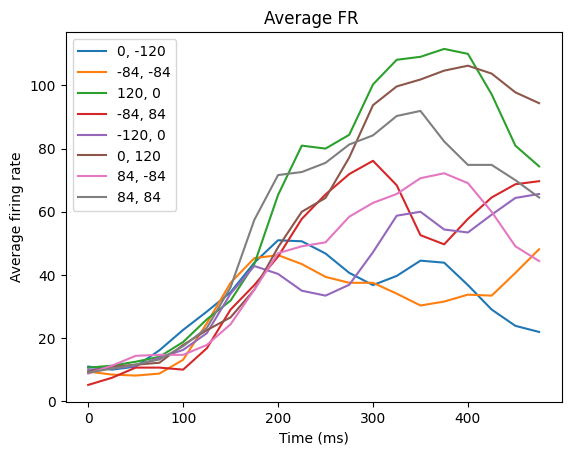

In [328]:
# arrays for each reach direction/target
arr504 = []
arr479 = []
arr505 = []
arr501 = []
arr485 = []
arr503 = []
arr499 = []
arr495 = []
arr497 = []

# populate arrays for each target with their spike counts
t = 0
for i in range(506):
        
    spikes =  R[i]['spikeRaster'][16,0:500] #spikes for electrode 17, trial i
    binX = nsp.bin(spikes, binWidth, binType = 'sum') # 20 bins x 25 ms each = 500 ms of total data

    # get target corresponding to trial i
    x = int(R[i]['target'][0][0])
    y = int(R[i]['target'][1][0])
    target = (x,y)
    index = targetDict[target]

    if index == 504: 
        trace = nsp.smooth(binX[0], window_len = 5)
        arr504 += [trace]
        continue
    elif index == 479:
        trace = nsp.smooth(binX[0], window_len = 5)
        arr479 += [trace]
        continue
    elif index == 505:
        trace = nsp.smooth(binX[0], window_len = 5)
        arr505 += [trace]
        continue
    elif index == 501:
        trace = nsp.smooth(binX[0], window_len = 5)
        arr501 += [trace]
        continue
    elif index == 485:
        trace = nsp.smooth(binX[0], window_len = 5)
        arr485 += [trace]
        continue
    elif index == 503:
        trace = nsp.smooth(binX[0], window_len = 5)
        arr503 += [trace]
        continue
    elif index == 499:
        trace = nsp.smooth(binX[0], window_len = 5)
        arr499 += [trace]
        continue
    elif index == 495:
        trace = nsp.smooth(binX[0], window_len = 5)
        arr495 += [trace]
        continue
    elif index == 497:
        trace = nsp.smooth(binX[0], window_len = 5)
        arr497 += [trace]
        t += 1
        continue

print(t)

times = []
c = 0
for it in range(20): 
    times += [c]
    c += 25

'''
{(0, 0): 504, (0, -120): 479, (-84, -84): 505, (120, 0): 501, 
(-84, 84): 485, (-120, 0): 503, (0, 120): 499, (84, -84): 495, (84, 84): 497}
'''
plt.figure()
# plt.plot(times, np.mean(arr504, axis = 0), label = '0,0')
plt.plot(times, np.mean(arr479, axis = 0)*40, label = '0, -120')
plt.plot(times, np.mean(arr505, axis = 0)*40, label = '-84, -84')
plt.plot(times, np.mean(arr501, axis = 0)*40, label = '120, 0')
plt.plot(times, np.mean(arr485, axis = 0)*40, label = '-84, 84')
plt.plot(times, np.mean(arr503, axis = 0)*40, label = '-120, 0')
plt.plot(times, np.mean(arr499, axis = 0)*40, label = '0, 120')
plt.plot(times, np.mean(arr495, axis = 0)*40, label = '84, -84')
plt.plot(times, np.mean(arr497, axis = 0)*40, label = '84, 84')
        
plt.legend( loc = 'upper left')
plt.xlabel('Time (ms)')
plt.ylabel('Average firing rate')
plt.title('Average FR ')
plt.show()
#====================================================#
# END YOUR CODE
#====================================================#